# Predicting Heart Disease Using Machine Learning 
This Notebook looks into using python-based machine learning and data science libraries in an attempt to build a machine learning model capable of 
predicting whether someone has heart disease or not based on their medical attributes.

We are going to take following approach:- 
1. Problem Definition
2. Data
3. Evaluation
4. Features
5. Modeling
6. Experimentation

   

# 1. Problem Definition:- 

In a statement,
> Given clinical parameters about a patient, can we predict whether or not they have herat disease?

# 2. Data:- 

The Original Data came from the Cleavland data from the UCI Machine Learning Repository :- https://archive.ics.uci.edu/dataset/45/heart+disease

There is also a version of it available on Kaggle:- https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data

# 3. Evaluation:- 

> If we can reach 95% accuracy at predicting whether or not a patient has deart disease during the proof of concept,
we will pursue the project.

# 4. Features:-
This is where you will get the information about the each of the features in 

**Create Data Dictionary**

*  1. age - age in years
* 2. 
sex - (1 = male; 0 = female
)* 3. 
cp - chest pain ty
pe
0: Typical angina: chest pain related decrease blood supply to the heart
1: Atypical angina: chest pain not related to heart
2: Non-anginal pain: typically esophageal spasms (non heart related)
3: Asymptomatic: chest pain not showing signs of d
i* 4. sease
trestbps - resting blood pressure (in mm Hg on admission to the ho pital)
anything above 130-140 is typically cause for
 * 5. concern
chol - serum cholestoral in mg/dl
serum = LDL + HDL + .2 * tri lycerides
above 200 is cause 
f* 6. or concern
fbs - (fasting blood sugar > 120 mg/dl) (1 = true  0 = false)
'>126' mg/dL sig
n* 7. als diabetes
restecg - resting electrocardiog
raphic results
0: Nothing to note
1: ST-T Wave abnormality
can range from mild symptoms to severe problems
signals non-normal heart beat
2: Possible or definite left ventricular hypertrophy
Enlarged heart's 
m* 8. ain pumping chamber
thalach - maximu
m* 9.  heart rate achieved
exang - exercise induced ang
* 10. ina (1 = yes; 0 = no)
oldpeak - ST depression induced by exercise relative to rest
looks at stress of heart during excercise
unhealt
h* 11. y heart will stress more
slope - the slope of th
e peak exercise ST segment
0: Upsloping: better heart rate with excercise (uncommon)
1: Flatsloping: minimal change (typical healthy heart)
2: Downslop
i* 12. ns: signs of unhealthy heart
ca - number of major vesse
ls (0-3) colored by flourosopy
colored vessel means the doctor can see the blood passing through
the more bloo
d* 13.  movement the better (no clo
ts)
thal - thalium stress result
1,3: normal
6: fixed defect: used to be defect but ok now
7: reversable defect: no pr
o* 14. per blood movement when excercising
target - have disease or not (1=y
es, 0=no) (= the predicted attribute)
Note: No personal identifiable information (PPI) can be found in the dataset.

It's a good idea to save these to a Python dictionary or in an external file, so we can look at them later without coming back here.
out coming back here. 0 = no)abetesease

### Preparing the Tools

We are going to use pandas, matplotlib and numpy for data analysis and Manipulation.


In [1]:
# Import all the tools we need:- 

# Regular EDA(Exploratory Data Analysis) and plotting Libraries:-
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# We want our plot should appear in this notebook:- 
%matplotlib inline

# Models from scikit-learn:- 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluation:- 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay


# Load Data:- 


In [2]:
df = pd.read_csv("heart-disease.csv")
df.shape # Shows Rows & Columns

(303, 14)

# Data Exploration (Exploratory Data Analysis or EDA)
The Goal is here to find more about the data and become a subject matter expert on the data you are working with...

1. What questions are you trying to solve?
2. What kind of data we have and how do we treat different types?
3. What is missing from the data and how do you deal with?
4. Where are the outliers and why you should be care about them?
5. How can you add, change and remove features to get more about the data?


In [3]:
# To see the first Five rows of the data:- 
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
# To see the last five rows of the data:- 
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
# Let's find out how many of each class there:- 
df["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

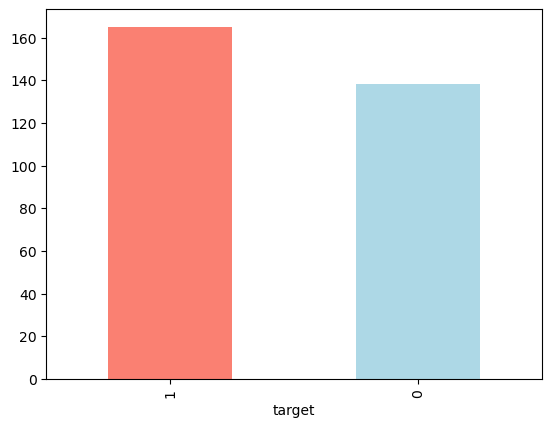

In [6]:
# Plot the df["target"].value_counts():- 
df["target"].value_counts().plot(kind = "bar", color = ["salmon", "lightblue"]);

In [7]:
# Information about each of the Columns:- 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
# Are there any missing values?
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
# Statistical Information :- 
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart Disease Frequency according to the sex (1-Male, 0-Female):- 

In [10]:
# Total counts of Male and female in Sex (1-male, 0-female):- 
df["sex"].value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [11]:
# Compare target columns with sex columns:- 
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


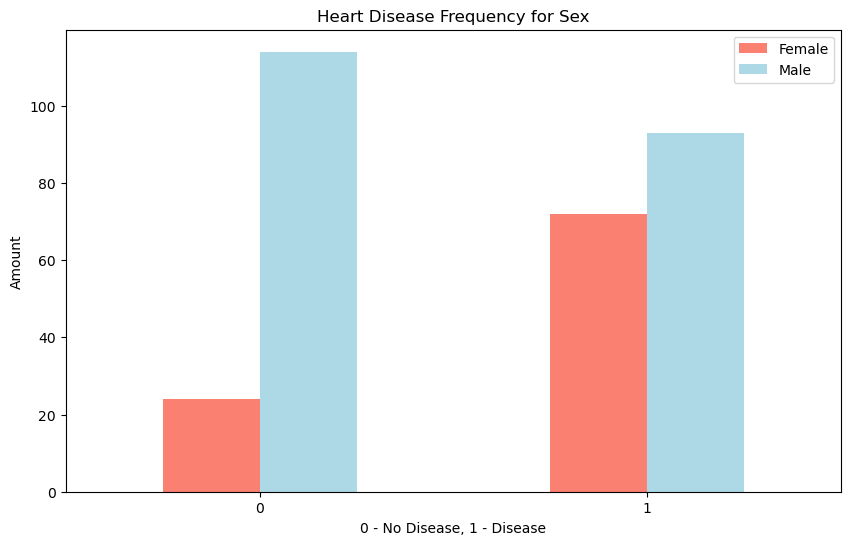

In [12]:
# Create a plot of crosstab:- 
pd.crosstab(df.target, df.sex).plot(kind = "bar",
                                    figsize = (10, 6),
                                    color = ["salmon", "lightblue"]);
plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 - No Disease, 1 - Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
plt.xticks(rotation = 0);

# Age Vs Max Heart Rate for Heart Disease:- 

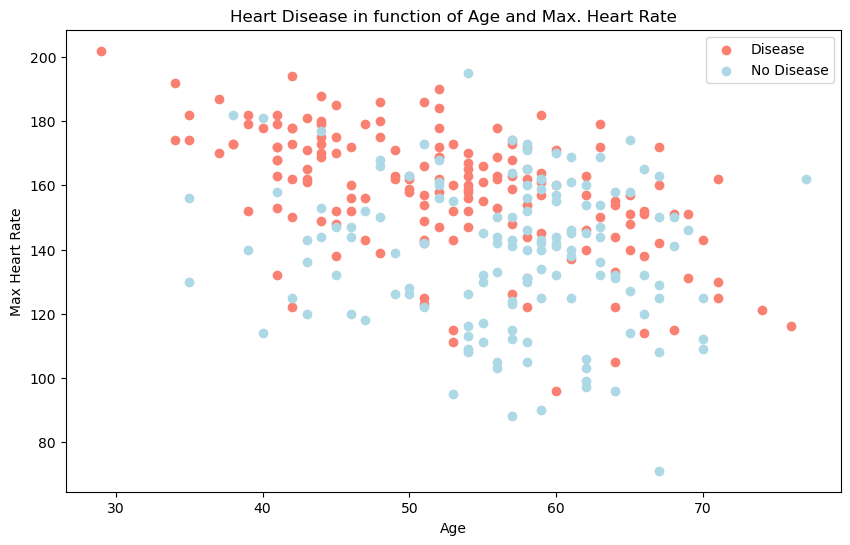

In [13]:
# Create another figure:- 

plt.figure(figsize = (10, 6))

# Scatter with positive example:- 
plt.scatter(df.age[df.target == 1],
            df.thalach[df.target ==1],
            color = ["salmon"]);

# Scatter with negative example:- 
plt.scatter(df.age[df.target == 0],
            df.thalach[df.target == 0],
            color = "lightblue");

# Add some helpful info:- 
plt.title("Heart Disease in function of Age and Max. Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);


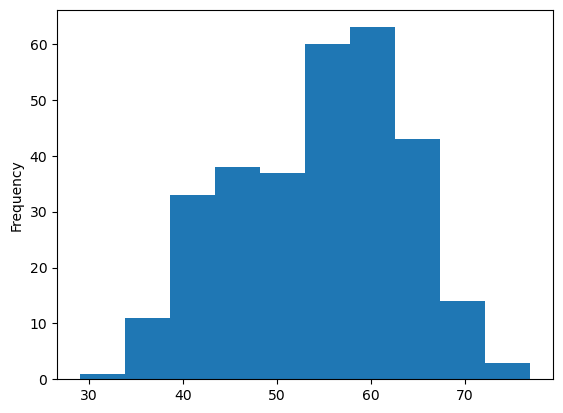

In [14]:
# Check the distribution of the age with the help of histogram:- 
df["age"].plot.hist();

## Heart Disease frquency per Chest Pain Type:- 
cp - chest pain type
* 0: Typical angina: chest pain related decrease blood supply to the heart
* 1: Atypical angina: chest pain not related to heart
* 2: Non-anginal pain: typically esophageal spasms (non heart related)
* 3: Asymptomatic: chest pain not showing signs of disease

In [15]:
# Make the crosstab of CP and Target Columns:- 
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


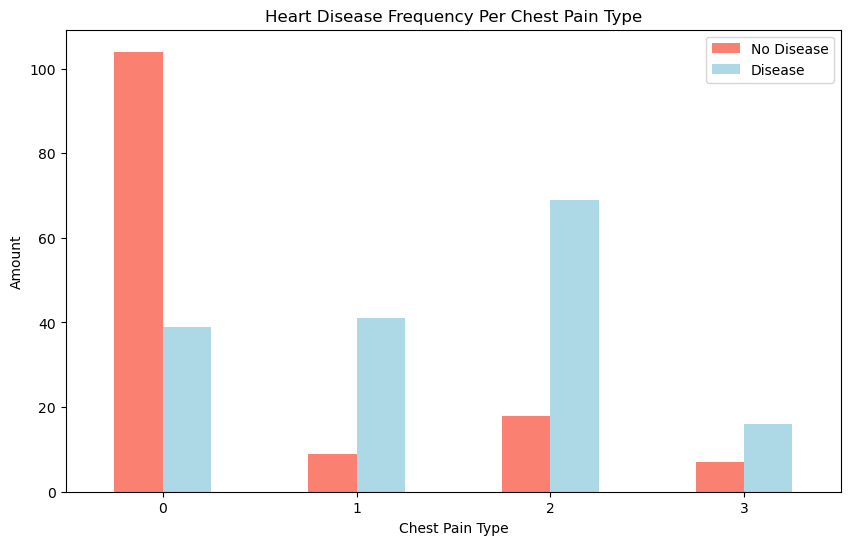

In [16]:
# Make the crosstab more visual:- 
pd.crosstab(df.cp, df.target).plot(kind = "bar",
                                   figsize = (10, 6),
                                   color = ["salmon", "lightblue"]);

# Add some communication:- 
plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation = 0);

In [17]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [19]:
# Make a correlation Matrix:- 
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


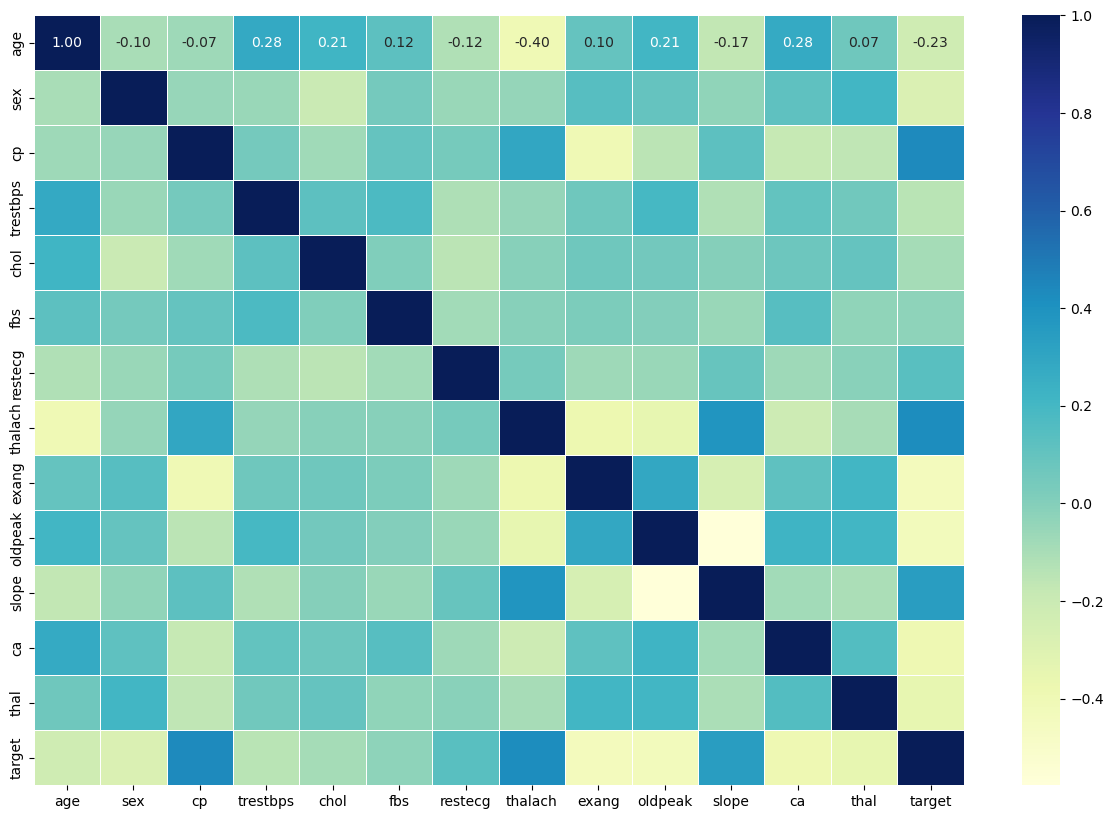

In [31]:
# Let's Make our Correlation Matrix more pretier:- 
corr_matrix = df.corr()

fig, ax = plt.subplots(figsize = (15, 10))
ax = sns.heatmap(corr_matrix,
                 annot = True,
                 linewidths = 0.5,
                 fmt = ".2f",
                 cmap = "YlGnBu")

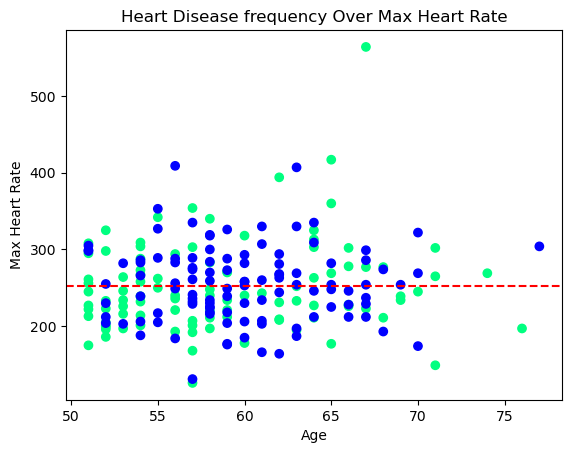

In [48]:
## Heart Disease Plot for over 50 years of age persons:- 

over_50 = df[df["age"] > 50]

# Scatter Plot:- 
fig, ax = plt.subplots()
ax.scatter(x = over_50["age"],
           y = over_50["chol"],
           c = over_50["target"],
           cmap = "winter");

# Some Communication:- 
ax.set(title = "Heart Disease frequency Over Max Heart Rate",
       xlabel = "Age",
       ylabel = "Max Heart Rate");

# add a meanline:- 
ax.axhline(over_50["chol"].mean(),
           linestyle = "--",
           color = "red");

## 5. Modelling

In [49]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [50]:
# Split the data into x and y:- 
x = df.drop("target", axis = 1)
y = df["target"]

In [51]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [52]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [53]:
# Split the data into training and test set:- 
np.random.seed(42)

# Split into training and test set:- 
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y, 
                                                    test_size = 0.2)

In [54]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [55]:
x_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,69,1,2,140,254,0,0,146,0,2.0,1,3,3
104,50,1,2,129,196,0,1,163,0,0.0,2,0,2
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
193,60,1,0,145,282,0,0,142,1,2.8,1,2,3


In [56]:
y_train

132    1
202    0
196    0
75     1
176    0
      ..
188    0
71     1
106    1
270    0
102    1
Name: target, Length: 242, dtype: int64

In [57]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

Now we have got our data split into training and test set, its time to build a machine learning model. 

We will train it (so find the patterns) on training set.

And we will test it (use the patterns) on test set.

We are going to try 3 different Machine Learning Models.
1. Logistics Regression
2. K Neighbors Classifier
3. Random Forest Classifier

In [65]:
# Put Models in dictionary:- 
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}

# Create a function to fit and score models:- 
def fit_and_score(models, x_train, x_test, y_train, y_test):
    """
    fits and evaluate given machine learning models.
    models: a dict of different machine learning models.
    x_train: training data(no labels).
    x_test: test data(no labels).
    y_train: training labels.
    y_test: test labels.
    """
    # Set random seed:- 
    np.random.seed(42)
    # Make a dictionary to keep model scores:- 
    model_scores = {}
    # Loop through models:- 
    for name, model in models.items():
        # fit the model to the data:- 
        model.fit(x_train, y_train)
        # Evaluate the model and append its score to model_scores:- 
        model_scores[name] = model.score(x_test, y_test)
    return model_scores

In [66]:
model_scores = fit_and_score(models = models,
                             x_train = x_train,
                             x_test = x_test,
                             y_train = y_train,
                             y_test = y_test)
model_scores

C:\Users\Arun Tiwari\heart-disease\env\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

# Model Comparision:- 

<Axes: >

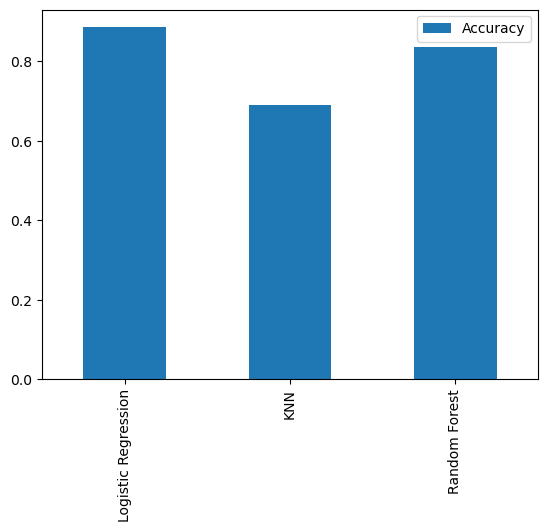

In [69]:
model_compare = pd.DataFrame(model_scores,index = ["Accuracy"])
model_compare.T.plot.bar()

Now We have got a baseline model.... and we know a models first predictions are not always what we should based our next steps off.... 

What should we do.. 

Let's look at the following..
* Hyperparameter Tuning
* Feature Importance
* Confusion Matrix
* Cross Validation
* Precision
* Recall
* f1 Score
* Classification Report
* ROC Curve
* Area Under the Curve (AUC)

## Hyperparameter Tuning (By Hand)

In [79]:
# Let's tune the KNN:- 

train_scores = []
test_scores = []

# Create a list of different values for n neighbors:- 
neighbors = range(1, 21)

# setup KNN Instance:- 
knn = KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors = i)

    # Fit the algorith
    knn.fit(x_train, y_train)

    # Update the training score list:- 
    train_scores.append(knn.score(x_train, y_train))

    # Update the test score list:-
    test_scores.append(knn.score(x_test, y_test))

In [74]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [75]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN Score on the test data : 75.41%


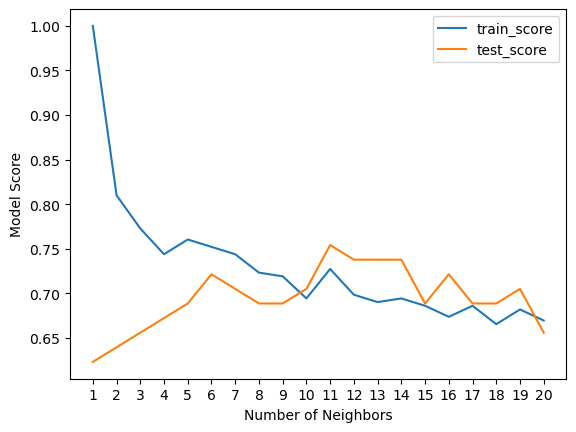

In [78]:
plt.plot(neighbors, train_scores, label = "train_score")
plt.plot(neighbors, test_scores, label = "test_score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of Neighbors")
plt.ylabel("Model Score")
plt.legend()

print(f"Maximum KNN Score on the test data : {max(test_scores)*100:.2f}%")


# Hyperparameter Tuning using Randomized Search CV:- 

We are going to tune:- 
* LogisticRegression()
* RandomForestClassifier()

using RandomizedSearchCV

In [90]:
# Create a Hyperparameter grid for Logistic Regression:- 
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver" : ["liblinear"]}

# Create a Hyperparameter grid for Random Forest:- 
rf_grid = {"n_estimators" : np.arange(10, 1000, 50),
           "max_depth" : [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

Now we have hyperparameter grids setup for each of the models, let's tune them using Randomized SearchCV...

In [93]:
# Tune Logistics Regression:- 
np.random.seed(42)

# Set Up Random Hyperparameter Search for Logistic Regression:- 
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions = log_reg_grid,
                                cv = 5,
                                n_iter = 20,
                                verbose = True)

# Fit Random Hyperparameter search model for Logistic Regression:- 
rs_log_reg.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [95]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [96]:
rs_log_reg.score(x_test, y_test)

0.8852459016393442

Now we have tuned LogisticRegression(), lets do the same for RandomForestClassifier()...

In [97]:
# Setup Random Seed:- 
np.random.seed(42)

# Setup random Hyperparameter Search for Random Forest Classifier:- 
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions = rf_grid,
                           cv = 5,
                           n_iter = 20,
                           verbose = True)

# Fit Random hyperparameter search model for Random Forest Classifier:- 
rs_rf.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [98]:
# Find the best hyperparameters:- 
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [99]:
# Evaluate the Randomized search RandomForestClassifier model:- 
rs_rf.score(x_test, y_test)

0.8688524590163934

In [100]:
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

# Hyperparameter Tuning with Grid Search CV
Since our Logistics Regression Model provides the best score so far, we will try and improve them again using GridSerachCV..

In [106]:
# Different Hyperparameter for our Logistics Regression Model:- 
log_reg_grid = {"C": np.logspace(-4, 4, 30),
                "solver": ["liblinear"]}

# Setup Grid Hyperparameter search for LogisticRegression:- 
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid = log_reg_grid,
                          cv =5,
                          verbose = True)


# fit Grid Hyperparameter search Model:- 
gs_log_reg.fit(x_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [107]:
# Check the best hyperparameters:- 
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [108]:
# Evaluate the GridSearch Logistics Regression Model:- 
gs_log_reg.score(x_test, y_test)

0.8852459016393442

# Evaluating Our Tuned Machine Learning Classifier, beyond Accuracy ..
* ROC Curve & AUC Score
* Confusion Matrix
* Classification Report
* Precision
* Recall
* F1 Score

...and it would be great if cross validation was used whereever possible...

To Make comparisions and evaluate our trained model, first we need to make predictions.. 


In [110]:
# Make Prediction with tuned model
y_preds = gs_log_reg.predict(x_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [111]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

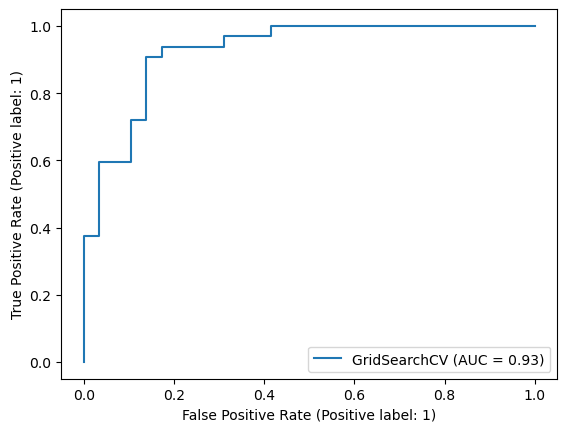

In [113]:
# Plot ROC Curve and calculate AUC Metric:- 

RocCurveDisplay.from_estimator(gs_log_reg, x_test, y_test);

In [114]:
# Confusion Matrix:- 
print(confusion_matrix(y_test, y_preds))

[[25  4]
 [ 3 29]]


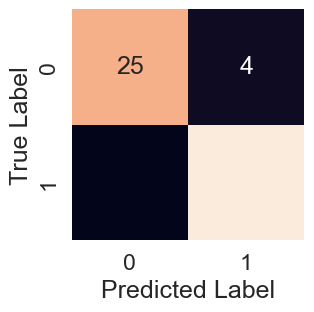

In [115]:
# Plot Confusion Matrix:- 
sns.set(font_scale = 1.5)

def plot_conf_mat(y_test, y_preds):
    """
    Plot a nice looking confusion matrix using seaborn heatmap..
    """
    fig, ax = plt.subplots(figsize = (3,3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot = True,
                     cbar = False)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")

plot_conf_mat(y_test, y_preds);

Now We have got ROC Curve, an AUC Metric and a Confusion Matrix. 

Let's get a classification report as well as cross validated precision, recall and f1-score...

In [116]:
# Get Classification Report:- 
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



# Calculate Evaluation Metrics using cross Validation:-
We are going to calculate precision, recall and f1 score of our model using cross validation and to do so,
we will be using cross_val_score()

In [118]:
# Check best hyperparameters:- 
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [120]:
# Create a new classifier with best parameters:- 
clf = LogisticRegression(C = 0.20433597178569418, 
                         solver = "liblinear")

In [124]:
# Cross-validated Accuracy:- 
cv_acc = cross_val_score(clf,
                         x, 
                         y,
                         scoring = "accuracy",
                         cv =5)
cv_acc

array([0.81967213, 0.90163934, 0.86885246, 0.88333333, 0.75      ])

In [126]:
cv_acc = np.mean(cv_acc)
cv_acc

0.8446994535519124

In [127]:
# Cross-validated precision:-
cv_precision = np.mean(cross_val_score(clf, 
                                        x, 
                                        y,
                                        cv = 5,
                                        scoring = "precision"))
cv_precision

0.8207936507936507

In [129]:
# Cross-validated recall:-
cv_recall = np.mean(cross_val_score(clf, 
                                        x, 
                                        y,
                                        cv = 5,
                                        scoring = "recall"))
cv_recall

0.9212121212121213

In [131]:
# Cross-validated f1-score:- 
cv_f1 = np.mean(cross_val_score(clf, 
                                        x, 
                                        y,
                                        cv = 5,
                                        scoring = "f1"))
cv_f1

0.8673007976269721

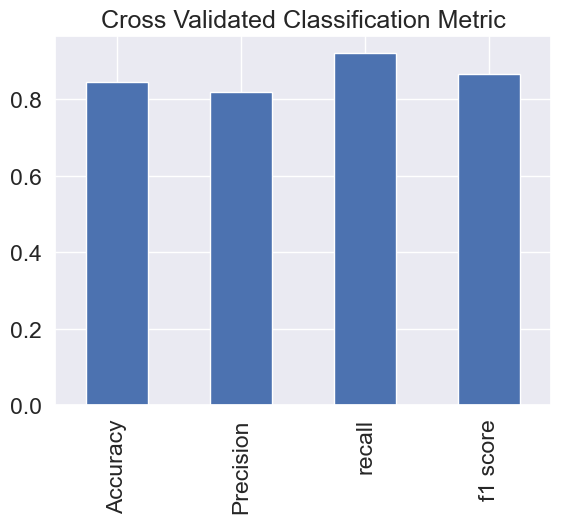

In [136]:
# Visualize our cross validated metric:- 
cv_metrics = pd.DataFrame({"Accuracy":cv_acc,
                          "Precision":cv_precision,
                          "recall": cv_recall,
                          "f1 score":cv_f1},
                          index = [0])
cv_metrics.T.plot.bar(title = "Cross Validated Classification Metric",
                      legend = False);

# Feature Importance:- 
Feature Importance is another as asking, "which features contributed most to the outcomes of the model and how did they contribute?

Finding Feature Importance is different for each Machine Learning Model. 

Let's find out the feature importance for LogisticRegression model....

In [141]:
# Fit an instance of LogisticsRegressions:- 
gs_log_reg.best_params_

clf = LogisticRegression(C = 0.20433597178569418,
                         solver = "liblinear")
clf.fit(x_train, y_train)

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [142]:
# Check Coef:- 
clf.coef_

array([[ 0.00316728, -0.86044674,  0.66067031, -0.01156993, -0.00166375,
         0.04386101,  0.31275865,  0.02459362, -0.60413094, -0.56862789,
         0.45051632, -0.63609908, -0.67663375]])

In [144]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [143]:
# match coef's of features to columns:- 
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.0031672830780218957,
 'sex': -0.8604467440762573,
 'cp': 0.6606703120090932,
 'trestbps': -0.011569932037408597,
 'chol': -0.00166374523064295,
 'fbs': 0.043861009724542044,
 'restecg': 0.3127586507840532,
 'thalach': 0.024593615555173243,
 'exang': -0.6041309439103262,
 'oldpeak': -0.5686278914396258,
 'slope': 0.4505163222528207,
 'ca': -0.6360990763634887,
 'thal': -0.6766337475895309}

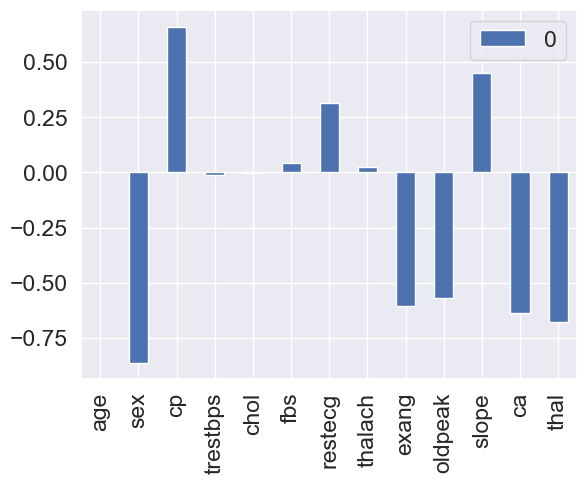

In [145]:
# Visualize feature importance:- 
feature_df = pd.DataFrame(feature_dict, index = [0])
feature_df.T.plot.bar();

In [146]:
pd.crosstab(df["sex"], df["target"])

target,0,1
sex,,
0,24,72
1,114,93


In [147]:
pd.crosstab(df["slope"], df["target"])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


* 0: Upsloping: better heart rate*  with excercise (uncommon)
* 1: Flatsloping: minimal cha* nge (typical healthy heart)
* 2: Downslop

# 6. Experimentation:- 

Well we've completed all the metrics your boss requested. You should be able to put together a great report containing a confusion matrix, a handful of cross-valdated metrics such as precision, recall and F1 as well as which features contribute most to the model making a decision.

But after all this you might be wondering where step 6 in the framework is, experimentation.

Well the secret here is, as you might've guessed, the whole thing is experimentation.

From trying different models, to tuning different models to figuring out which hyperparameters were best.

What we've worked through so far has been a series of experiments.

And the truth is, we could keep going. But of course, things can't go on forever.

So by this stage, after trying a few different things, we'd ask ourselves did we meet the evaluation metric?

Remember we defined one in step 3.

If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursure this project.

In this case, we didn't. The highest accuracy our model achieved was below 90%.

What next?
You might be wondering, what happens when the evaluation metric doesn't get hit?

Is everything we've done wasted?

No.

It means we know what doesn't work. In this case, we know the current model we're using (a tuned version of LogisticRegression) along with our specific data set doesn't hit the target we set ourselves.

This is where step 6 comes into its own.

A good next step would be to discuss with your team or research on your own differ* ent options of going forward.* 

Could you collect more data?

Could you try a better model? If you're working with structured data, you might want * to look into CatBoost or XGBoost.

Could you improve the current mode* ls (beyond what we've done so far)?

If your model is good enough, how would you export it and share it with others? (Hint: check out Scikit-Learn'* s documentation on model persistance)

The key here is to remember, your biggest restriction will be time. Hence, why it's paramount to m* inimise your times between experiments.

The more you try, the more you figure out what doesn't work, the more you'll start to get a hang of what does.